In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance
from sklearn import metrics

# premiers model de regression lineaire

In [2]:
immo_df = pd.read_csv("base_line.csv")
immo_df

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
y = immo_df["median_house_value"]
X = immo_df.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,<1H OCEAN


In [5]:
X= X.drop("ocean_proximity", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815
...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750


## dummy model

In [6]:
# instantiate Dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(X, y)

# calculate the score
dummy_clf.score(X, y)

0.04620881782945736

In [7]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=1)

In [8]:
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(X_train, y_train)

# calculate the score
dummy_clf.score(X_test, y_test)

0.04400484457004441

In [9]:
# Splitting the data
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=4)

dummy_clf3 = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf3.fit(X3_train, y3_train)

# calculate the score
dummy_clf3.score(X3_test, y3_test)

0.04804198627371821

In [10]:
# Splitting the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=5)

dummy_clf2 = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf2.fit(X2_train, y2_train)

# calculate the score
dummy_clf2.score(X2_test, y2_test)

0.04481227291077917

## dummy model cross_validate

In [11]:
# Instanciate model
dummy_clf_c = DummyClassifier(strategy="most_frequent")

# 5-Fold Cross validate model
cv_results = cross_validate(dummy_clf_c, X, y, cv=5)

# obtain the mean of scores
cv_results['test_score'].mean()

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.046208804176149545

Le dummy modele resultat nul 

## LinearRegression


In [12]:
# Splitting the data
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X4_train, y4_train)

# Evaluate the model with the test set
model.score(X4_test, y4_test)


0.6311871393336708

In [13]:
y_predicted = model.predict(X4_test)

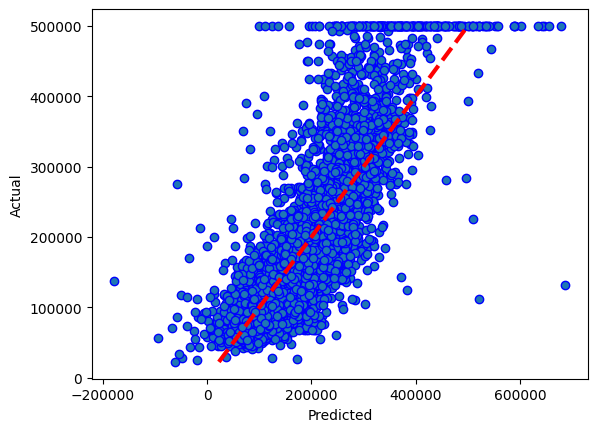

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y4_test, edgecolors=(0, 0, 1))
ax.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y4_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [15]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y4_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y4_test, y_predicted))
r2 = metrics.r2_score(y4_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 50764.920142318566
RMSE is 69354.23690361973
R2 score is 0.6311871393336708


## Cross validation

In [16]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print('Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 50933.554958532695
 Average RMSE:  69612.35723615628
Average R2:  0.6348249131619211


MAE, MSE doit etre faible, r2 doit etre proche de 1

# second model de regression lineaire

In [2]:
immo_df2 = pd.read_csv("immo_iteration2.csv")
immo_df2

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,localisation
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,4
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,4
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,4
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,4
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,3


In [3]:
y = immo_df2["median_house_value"]
X = immo_df2.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,localisation
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,INLAND,4
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,<1H OCEAN,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,INLAND,4
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,<1H OCEAN,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,INLAND,4
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,INLAND,4
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,NEAR BAY,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,INLAND,4
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,<1H OCEAN,3


In [5]:
X= X.drop("ocean_proximity", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,localisation
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,4
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,4
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,4
...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,4
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,4
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,3


## Linear Regression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)


0.6339393851301343

In [7]:
y_predicted = model.predict(X_test)

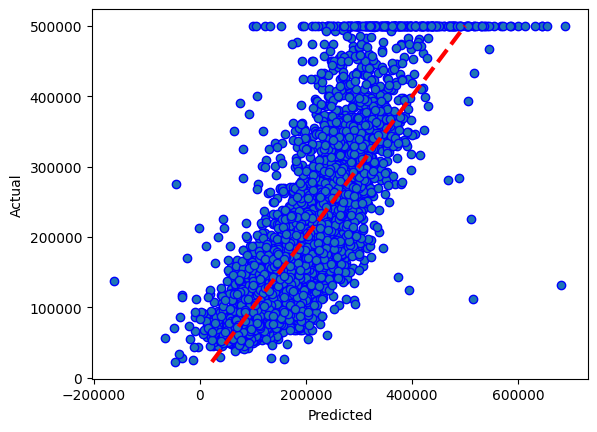

In [8]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 50327.916837201214
RMSE is 69094.97621880764
R2 score is 0.6339393851301343


## Cross validation

In [10]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 50509.958234882215
 Average RMSE:  69320.88678728184
Average R2:  0.6378776532963158


# troisiéme model de regression lineaire

In [2]:
immo_df3 = pd.read_csv("immo_iteration3.csv")
immo_df3

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0.0,1.0,0.0,0.0,0.0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0,0.0,0.0,0.0,0.0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0.0,1.0,0.0,0.0,0.0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0,0.0,0.0,0.0,0.0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0.0,1.0,0.0,0.0,0.0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0.0,0.0,0.0,1.0,0.0
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0.0,1.0,0.0,0.0,0.0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0,0.0,0.0,0.0,0.0


In [3]:
y = immo_df3["median_house_value"]
X = immo_df3.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,0.0,1.0,0.0,0.0,0.0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,1.0,0.0,0.0,0.0,0.0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.0,1.0,0.0,0.0,0.0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.0,0.0,0.0,0.0,0.0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,0.0,1.0,0.0,0.0,0.0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0,0.0,0.0,1.0,0.0
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,0.0,1.0,0.0,0.0,0.0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,1.0,0.0,0.0,0.0,0.0


## Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6442589000896722

In [6]:
y_predicted = model.predict(X_test)

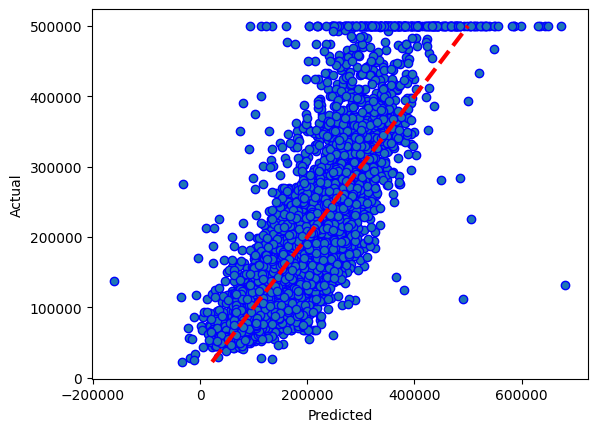

In [7]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49473.46007442098
RMSE is 68114.09504584323
R2 score is 0.6442589000896722


## Cross validation

In [10]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 49824.10689523587
 Average RMSE:  68563.21186338582
Average R2:  0.6457289834760923


# quatrieme model de regression lineaire

In [2]:
immo_df4 = pd.read_csv("immo_iteration4.csv")
immo_df4

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,0.0,1.0,0.0,0.0,0.0,72000.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,1.0,0.0,0.0,0.0,0.0,274100.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.0,1.0,0.0,0.0,0.0,58300.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.0,0.0,0.0,0.0,0.0,200000.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,0.0,1.0,0.0,0.0,0.0,117900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,0.0,1.0,0.0,0.0,0.0,93800.0
16508,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0,0.0,0.0,1.0,0.0,103100.0
16509,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,0.0,1.0,0.0,0.0,0.0,192600.0
16510,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,1.0,0.0,0.0,0.0,0.0,153500.0


In [3]:
y = immo_df4["median_house_value"]
X = immo_df4.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,0.0,1.0,0.0,0.0,0.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,1.0,0.0,0.0,0.0,0.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.0,1.0,0.0,0.0,0.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.0,0.0,0.0,0.0,0.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,0.0,1.0,0.0,0.0,0.0
16508,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0,0.0,0.0,1.0,0.0
16509,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,0.0,1.0,0.0,0.0,0.0
16510,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,1.0,0.0,0.0,0.0,0.0


## Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6450675693825076

In [6]:
y_predicted = model.predict(X_test)

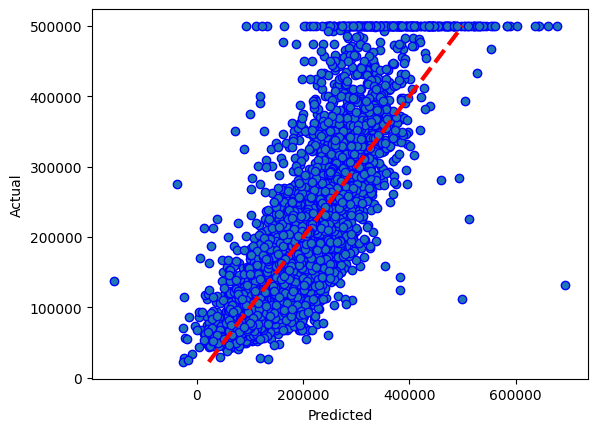

In [7]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49304.23614453691
RMSE is 68036.63265024588
R2 score is 0.6450675693825076


## Cross validation

In [10]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 49591.873391485016
 Average RMSE:  68372.96520297213
Average R2:  0.6476906676413432


# cinquieme model de regression lineaire

In [2]:
immo_df5 = pd.read_csv("immo_iteration5.csv")
immo_df5

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,0.100392,0.449203,0.449522,0.098039,0.046981,0.073103,0.039071,0.068257,0.067709,0.0,1.0,0.0,0.0,0.0,0.117527
1,0.513591,0.652390,0.121148,0.137255,0.051534,0.053857,0.024076,0.055592,0.442297,1.0,0.0,0.0,0.0,0.0,0.534227
2,0.120839,0.414343,0.431456,0.470588,0.022104,0.032904,0.026010,0.034868,0.072668,0.0,1.0,0.0,0.0,0.0,0.089280
3,0.207568,0.600598,0.165781,0.588235,0.015669,0.035232,0.016648,0.037007,0.070930,1.0,0.0,0.0,0.0,0.0,0.381444
4,0.801444,0.310757,0.557917,0.392157,0.048736,0.057582,0.031587,0.060855,0.247003,0.0,1.0,0.0,0.0,0.0,0.212166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.053249,0.244024,0.749203,0.372549,0.037111,0.042837,0.020797,0.040789,0.176729,0.0,1.0,0.0,0.0,0.0,0.162476
16508,0.915645,0.209163,0.591923,0.941176,0.060004,0.077914,0.031615,0.075000,0.145750,0.0,0.0,0.0,1.0,0.0,0.181651
16509,0.571636,0.311753,0.678002,0.352941,0.064226,0.071240,0.033717,0.070230,0.275576,0.0,1.0,0.0,0.0,0.0,0.366186
16510,0.321576,0.618526,0.172157,0.745098,0.070458,0.130064,0.071274,0.126809,0.143108,1.0,0.0,0.0,0.0,0.0,0.285568


In [3]:
y = immo_df5["median_house_value"]
X = immo_df5.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.100392,0.449203,0.449522,0.098039,0.046981,0.073103,0.039071,0.068257,0.067709,0.0,1.0,0.0,0.0,0.0
1,0.513591,0.652390,0.121148,0.137255,0.051534,0.053857,0.024076,0.055592,0.442297,1.0,0.0,0.0,0.0,0.0
2,0.120839,0.414343,0.431456,0.470588,0.022104,0.032904,0.026010,0.034868,0.072668,0.0,1.0,0.0,0.0,0.0
3,0.207568,0.600598,0.165781,0.588235,0.015669,0.035232,0.016648,0.037007,0.070930,1.0,0.0,0.0,0.0,0.0
4,0.801444,0.310757,0.557917,0.392157,0.048736,0.057582,0.031587,0.060855,0.247003,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.053249,0.244024,0.749203,0.372549,0.037111,0.042837,0.020797,0.040789,0.176729,0.0,1.0,0.0,0.0,0.0
16508,0.915645,0.209163,0.591923,0.941176,0.060004,0.077914,0.031615,0.075000,0.145750,0.0,0.0,0.0,1.0,0.0
16509,0.571636,0.311753,0.678002,0.352941,0.064226,0.071240,0.033717,0.070230,0.275576,0.0,1.0,0.0,0.0,0.0
16510,0.321576,0.618526,0.172157,0.745098,0.070458,0.130064,0.071274,0.126809,0.143108,1.0,0.0,0.0,0.0,0.0


## Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6450733391883343

In [6]:
y_predicted = model.predict(X_test)

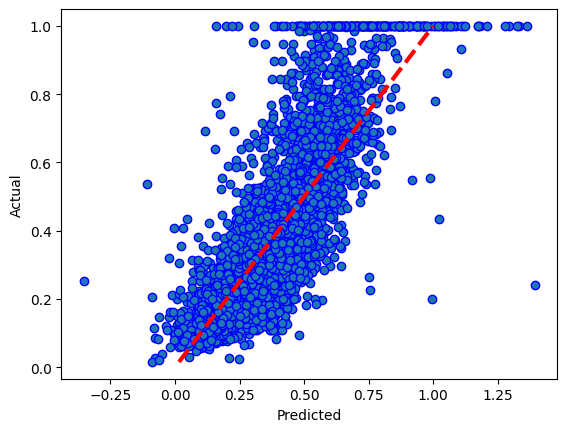

In [7]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.10166273570293143
RMSE is 0.14027999811119446
R2 score is 0.6450733391883343


## Cross validation

In [10]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 0.10230794618223593
 Average RMSE:  0.14107095467728648
Average R2:  0.6472046512188706


# 6eme model de regression lineaire

In [2]:
immo_df6 = pd.read_csv("immo_iteration6.csv")
immo_df6

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,0.0,1.0,0.0,0.0,0.0,72000.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,1.0,0.0,0.0,0.0,0.0,274100.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.0,1.0,0.0,0.0,0.0,58300.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.0,0.0,0.0,0.0,0.0,200000.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,0.0,1.0,0.0,0.0,0.0,117900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,0.0,1.0,0.0,0.0,0.0,93800.0
16463,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0,0.0,0.0,1.0,0.0,103100.0
16464,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,0.0,1.0,0.0,0.0,0.0,192600.0
16465,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,1.0,0.0,0.0,0.0,0.0,153500.0


In [3]:
y = immo_df6["median_house_value"]
X = immo_df6.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,0.0,1.0,0.0,0.0,0.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,1.0,0.0,0.0,0.0,0.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.0,1.0,0.0,0.0,0.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.0,0.0,0.0,0.0,0.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,0.0,1.0,0.0,0.0,0.0
16463,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0,0.0,0.0,1.0,0.0
16464,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,0.0,1.0,0.0,0.0,0.0
16465,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,1.0,0.0,0.0,0.0,0.0


## Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6473755217658708

In [6]:
y_predicted = model.predict(X_test)

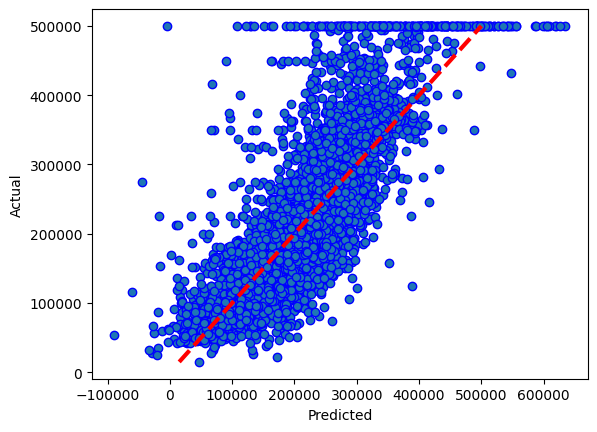

In [7]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49617.7743928112
RMSE is 69301.43148531129
R2 score is 0.6473755217658708


## Cross validation

In [10]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 49114.06233295668
 Average RMSE:  67279.6625045427
Average R2:  0.6540727672763466


# 7 model de regression lineaire

In [2]:
immo_df7 = pd.read_csv("immo_iteration7.csv")
immo_df7

,index,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,2072.0,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,0.0,1.0,0.0,0.0,0.0,72000.0
1,10600.0,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,1.0,0.0,0.0,0.0,0.0,274100.0
2,2494.0,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.0,1.0,0.0,0.0,0.0,58300.0
3,4284.0,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.0,0.0,0.0,0.0,0.0,200000.0
4,16541.0,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,0.0,1.0,0.0,0.0,0.0,117900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,0.0,1.0,0.0,0.0,0.0,93800.0
16508,18898.0,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0,0.0,0.0,1.0,0.0,103100.0
16509,11798.0,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,0.0,1.0,0.0,0.0,0.0,192600.0
16510,6637.0,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,1.0,0.0,0.0,0.0,0.0,153500.0


In [3]:
y = immo_df7["median_house_value"]
X = immo_df7.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072.0,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,0.0,1.0,0.0,0.0,0.0
1,10600.0,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,1.0,0.0,0.0,0.0,0.0
2,2494.0,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.0,1.0,0.0,0.0,0.0
3,4284.0,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.0,0.0,0.0,0.0,0.0
4,16541.0,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,0.0,1.0,0.0,0.0,0.0
16508,18898.0,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0,0.0,0.0,1.0,0.0
16509,11798.0,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,0.0,1.0,0.0,0.0,0.0
16510,6637.0,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,1.0,0.0,0.0,0.0,0.0


## Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6366764321185487

In [6]:
y_predicted = model.predict(X_test)

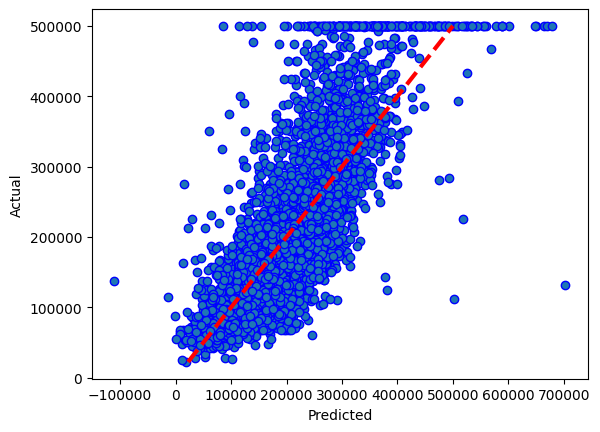

In [7]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49849.25434858164
RMSE is 68836.17887261901
R2 score is 0.6366764321185487


## Cross validation

In [10]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 50198.819316967114
 Average RMSE:  69293.07520012194
Average R2:  0.6381380273853376


# 8 model de regression lineaire

In [2]:
immo_df8 = pd.read_csv("immo_iteration8.csv")
immo_df8

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,0.0,1.0,0.0,0.0,0.0,72000.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,1.0,0.0,0.0,0.0,0.0,274100.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.0,1.0,0.0,0.0,0.0,58300.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.0,0.0,0.0,0.0,0.0,200000.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,0.0,1.0,0.0,0.0,0.0,117900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,0.0,1.0,0.0,0.0,0.0,93800.0
16463,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0,0.0,0.0,1.0,0.0,103100.0
16464,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,0.0,1.0,0.0,0.0,0.0,192600.0
16465,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,1.0,0.0,0.0,0.0,0.0,153500.0


In [3]:
y = immo_df8["median_house_value"]
X = immo_df8.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,0.0,1.0,0.0,0.0,0.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,1.0,0.0,0.0,0.0,0.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.0,1.0,0.0,0.0,0.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.0,0.0,0.0,0.0,0.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,0.0,1.0,0.0,0.0,0.0
16463,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0,0.0,0.0,1.0,0.0
16464,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,0.0,1.0,0.0,0.0,0.0
16465,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,1.0,0.0,0.0,0.0,0.0


## Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6473755217658708

In [7]:
y_predicted = model.predict(X_test)

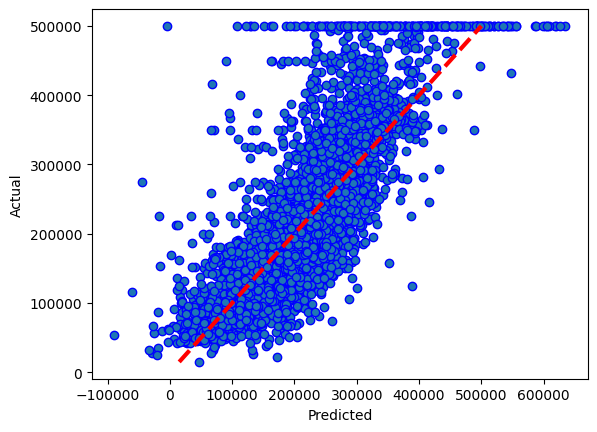

In [8]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49617.7743928112
MSE is 4802688405.913295
R2 score is 0.6473755217658708


## Cross validation

In [27]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 50933.554958532695
 Average RMSE:  69612.35723615628
Average R2:  0.6348249131619211


# 8 model de regression lineaire

In [2]:
immo_df9 = pd.read_csv("immo_iteration9.csv")
immo_df9

,index,latitude,housing_median_age,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,2072.0,36.77,6.0,1397.0,1.4817,0.0,1.0,0.0,0.0,0.0,72000.0
1,10600.0,33.68,8.0,862.0,6.9133,1.0,0.0,0.0,0.0,0.0,274100.0
2,2494.0,36.60,25.0,931.0,1.5536,0.0,1.0,0.0,0.0,0.0,58300.0
3,4284.0,34.10,31.0,597.0,1.5284,1.0,0.0,0.0,0.0,0.0,200000.0
4,16541.0,37.79,21.0,1130.0,4.0815,0.0,1.0,0.0,0.0,0.0,117900.0
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,39.59,20.0,745.0,3.0625,0.0,1.0,0.0,0.0,0.0,93800.0
16508,18898.0,38.11,49.0,1131.0,2.6133,0.0,0.0,0.0,1.0,0.0,103100.0
16509,11798.0,38.92,19.0,1206.0,4.4958,0.0,1.0,0.0,0.0,0.0,192600.0
16510,6637.0,34.16,39.0,2546.0,2.5750,1.0,0.0,0.0,0.0,0.0,153500.0


In [3]:
y = immo_df9["median_house_value"]
X = immo_df9.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,latitude,housing_median_age,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072.0,36.77,6.0,1397.0,1.4817,0.0,1.0,0.0,0.0,0.0
1,10600.0,33.68,8.0,862.0,6.9133,1.0,0.0,0.0,0.0,0.0
2,2494.0,36.60,25.0,931.0,1.5536,0.0,1.0,0.0,0.0,0.0
3,4284.0,34.10,31.0,597.0,1.5284,1.0,0.0,0.0,0.0,0.0
4,16541.0,37.79,21.0,1130.0,4.0815,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,39.59,20.0,745.0,3.0625,0.0,1.0,0.0,0.0,0.0
16508,18898.0,38.11,49.0,1131.0,2.6133,0.0,0.0,0.0,1.0,0.0
16509,11798.0,38.92,19.0,1206.0,4.4958,0.0,1.0,0.0,0.0,0.0
16510,6637.0,34.16,39.0,2546.0,2.5750,1.0,0.0,0.0,0.0,0.0


## Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5884862270132941

In [6]:
y_predicted = model.predict(X_test)

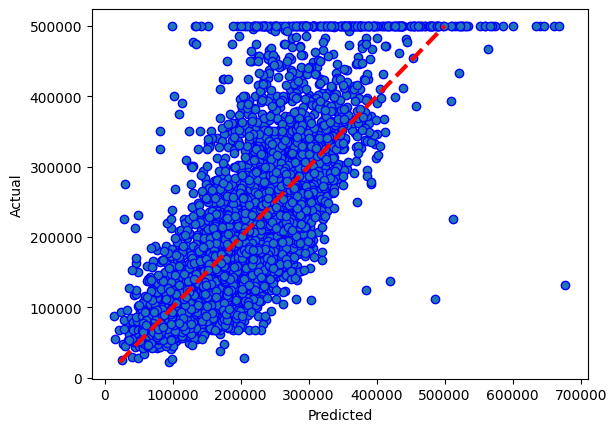

In [7]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [8]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 53310.864873439554
RMSE is 73259.19748195533
R2 score is 0.5884862270132941


## Cross validation

In [9]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 53128.94163614484
 Average RMSE:  72729.18935197606
Average R2:  0.6013727363946266


# 10 model de regression lineaire

In [19]:
immo_df10 = pd.read_csv("immo_iteration10.csv")
immo_df10

,index,longitude,latitude,housing_median_age,total_bedrooms,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,room_per_households
0,2072.0,-119.84,36.77,6.0,473.0,1397.0,1.4817,0.0,1.0,0.0,0.0,0.0,72000.0,4.443645
1,10600.0,-117.80,33.68,8.0,349.0,862.0,6.9133,1.0,0.0,0.0,0.0,0.0,274100.0,5.976471
2,2494.0,-120.19,36.60,25.0,214.0,931.0,1.5536,0.0,1.0,0.0,0.0,0.0,58300.0,4.088785
3,4284.0,-118.32,34.10,31.0,229.0,597.0,1.5284,1.0,0.0,0.0,0.0,0.0,200000.0,2.740088
4,16541.0,-121.23,37.79,21.0,373.0,1130.0,4.0815,0.0,1.0,0.0,0.0,0.0,117900.0,5.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,278.0,745.0,3.0625,0.0,1.0,0.0,0.0,0.0,93800.0,5.860000
16463,18898.0,-122.25,38.11,49.0,504.0,1131.0,2.6133,0.0,0.0,0.0,1.0,0.0,103100.0,5.163755
16464,11798.0,-121.22,38.92,19.0,461.0,1206.0,4.4958,0.0,1.0,0.0,0.0,0.0,192600.0,5.899767
16465,6637.0,-118.14,34.16,39.0,840.0,2546.0,2.5750,1.0,0.0,0.0,0.0,0.0,153500.0,3.591203


In [11]:
y = immo_df10["median_house_value"]
X = immo_df10.copy()

In [12]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_bedrooms,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,room_per_households
0,2072.0,-119.84,36.77,6.0,473.0,1397.0,1.4817,0.0,1.0,0.0,0.0,0.0,4.443645
1,10600.0,-117.80,33.68,8.0,349.0,862.0,6.9133,1.0,0.0,0.0,0.0,0.0,5.976471
2,2494.0,-120.19,36.60,25.0,214.0,931.0,1.5536,0.0,1.0,0.0,0.0,0.0,4.088785
3,4284.0,-118.32,34.10,31.0,229.0,597.0,1.5284,1.0,0.0,0.0,0.0,0.0,2.740088
4,16541.0,-121.23,37.79,21.0,373.0,1130.0,4.0815,0.0,1.0,0.0,0.0,0.0,5.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,278.0,745.0,3.0625,0.0,1.0,0.0,0.0,0.0,5.860000
16463,18898.0,-122.25,38.11,49.0,504.0,1131.0,2.6133,0.0,0.0,0.0,1.0,0.0,5.163755
16464,11798.0,-121.22,38.92,19.0,461.0,1206.0,4.4958,0.0,1.0,0.0,0.0,0.0,5.899767
16465,6637.0,-118.14,34.16,39.0,840.0,2546.0,2.5750,1.0,0.0,0.0,0.0,0.0,3.591203


## Linear Regression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6436124966178076

In [14]:
y_predicted = model.predict(X_test)

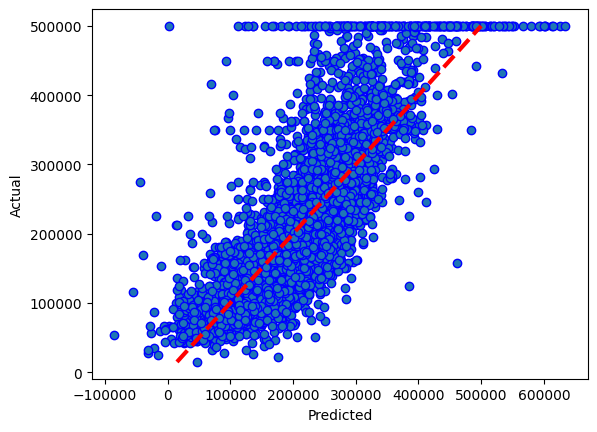

In [15]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [16]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49917.74778670191
RMSE is 69670.22463210154
R2 score is 0.6436124966178076


## Cross validation

In [17]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 49424.366254164095
 Average RMSE:  67597.31665394851
Average R2:  0.6508107132208601


# 11 model de regression lineaire

In [10]:
immo_df11 = pd.read_csv("immo_iteration11.csv")
immo_df11

,index,longitude,latitude,housing_median_age,total_bedrooms,population,room_per_households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.100392,0.449203,0.449522,0.098039,0.075870,0.085511,0.027318,0.073012,0.0,1.0,0.0,0.0,0.0
1,0.513591,0.652390,0.121148,0.137255,0.055896,0.052693,0.038958,0.476936,1.0,0.0,0.0,0.0,0.0
2,0.120839,0.414343,0.431456,0.470588,0.034149,0.056926,0.024624,0.078359,0.0,1.0,0.0,0.0,0.0
3,0.207568,0.600598,0.165781,0.588235,0.036566,0.036437,0.014382,0.076485,1.0,0.0,0.0,0.0,0.0
4,0.801444,0.310757,0.557917,0.392157,0.059762,0.069133,0.032809,0.266347,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,0.053249,0.244024,0.749203,0.372549,0.044459,0.045516,0.038074,0.190569,0.0,1.0,0.0,0.0,0.0
16463,0.915645,0.209163,0.591923,0.941176,0.080863,0.069194,0.032787,0.157164,0.0,0.0,0.0,1.0,0.0
16464,0.571636,0.311753,0.678002,0.352941,0.073937,0.073795,0.038376,0.297157,0.0,1.0,0.0,0.0,0.0
16465,0.321576,0.618526,0.172157,0.745098,0.134987,0.155993,0.020845,0.154316,1.0,0.0,0.0,0.0,0.0


In [11]:
y = immo_df10["median_house_value"]
X = immo_df11.copy()

## Linear Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6436124966178082

In [13]:
y_predicted = model.predict(X_test)

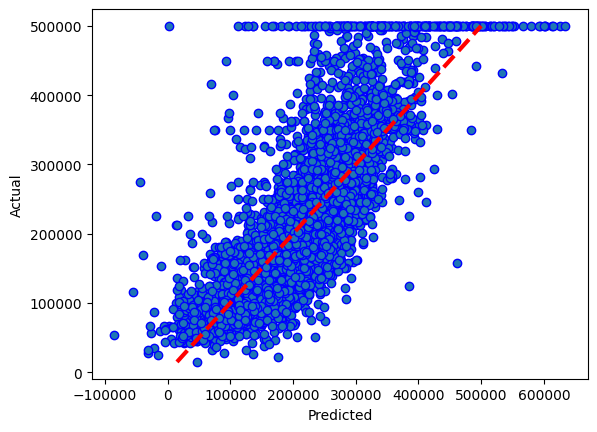

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [15]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49917.747786701984
RMSE is 69670.2246321015
R2 score is 0.6436124966178082


## Cross validation

In [17]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 49424.36625416403
 Average RMSE:  67597.31665394848
Average R2:  0.6508107132208606


# 12 model de regression lineaire

In [18]:
immo_df12 = pd.read_csv("immo_iteration12.csv")
immo_df12

,index,longitude,latitude,housing_median_age,total_bedrooms,population,room_per_households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.799006,-0.357143,0.666667,-1.210526,0.108262,0.240126,-0.486327,-0.946324,0.0,1.0,0.0,0.0,0.0
1,0.031859,0.182540,-0.150794,-1.105263,-0.245014,-0.323328,0.472342,1.567026,1.0,0.0,0.0,0.0,0.0
2,-0.757892,-0.449735,0.621693,-0.210526,-0.629630,-0.250658,-0.708266,-0.913054,0.0,1.0,0.0,0.0,0.0
3,-0.583496,0.044974,-0.039683,0.105263,-0.586895,-0.602422,-1.551776,-0.924714,1.0,0.0,0.0,0.0,0.0
4,0.610678,-0.724868,0.936508,-0.421053,-0.176638,-0.041074,-0.034131,0.256675,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,-0.893804,-0.902116,1.412698,-0.473684,-0.447293,-0.446551,0.399498,-0.214844,0.0,1.0,0.0,0.0,0.0
16463,0.840316,-0.994709,1.021164,1.052632,0.196581,-0.040021,-0.035952,-0.422701,0.0,0.0,0.0,1.0,0.0
16464,0.148578,-0.722222,1.235450,-0.526316,0.074074,0.038968,0.424369,0.448383,0.0,1.0,0.0,0.0,0.0
16465,-0.354248,0.092593,-0.023810,0.526316,1.153846,1.450237,-1.019467,-0.440424,1.0,0.0,0.0,0.0,0.0


In [19]:
y = immo_df10["median_house_value"]
X = immo_df12.copy()

In [ ]:
y = immo_df10["median_house_value"]
X = immo_df12.copy()

## Linear Regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6436124966178081

In [21]:
y_predicted = model.predict(X_test)

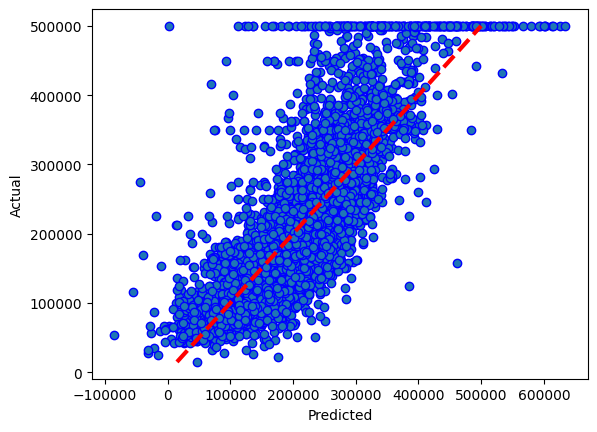

In [22]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [23]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49917.74778670199
RMSE is 69670.2246321015
R2 score is 0.6436124966178081


## Cross validation

In [24]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 49424.366254164044
 Average RMSE:  67597.31665394848
Average R2:  0.6508107132208604


# 13 model de regression lineaire

In [2]:
immo_df13 = pd.read_csv("immo_iteration13.csv")
immo_df13

,index,longitude,latitude,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,housing_median_age,total_bedrooms,population,room_per_households,median_income
0,2072.0,-119.84,36.77,0.0,1.0,0.0,0.0,0.0,72000.0,-1.210526,0.108262,0.240126,-0.486327,-0.946324
1,10600.0,-117.80,33.68,1.0,0.0,0.0,0.0,0.0,274100.0,-1.105263,-0.245014,-0.323328,0.472342,1.567026
2,2494.0,-120.19,36.60,0.0,1.0,0.0,0.0,0.0,58300.0,-0.210526,-0.629630,-0.250658,-0.708266,-0.913054
3,4284.0,-118.32,34.10,1.0,0.0,0.0,0.0,0.0,200000.0,0.105263,-0.586895,-0.602422,-1.551776,-0.924714
4,16541.0,-121.23,37.79,0.0,1.0,0.0,0.0,0.0,117900.0,-0.421053,-0.176638,-0.041074,-0.034131,0.256675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,0.0,1.0,0.0,0.0,0.0,93800.0,-0.473684,-0.447293,-0.446551,0.399498,-0.214844
16463,18898.0,-122.25,38.11,0.0,0.0,0.0,1.0,0.0,103100.0,1.052632,0.196581,-0.040021,-0.035952,-0.422701
16464,11798.0,-121.22,38.92,0.0,1.0,0.0,0.0,0.0,192600.0,-0.526316,0.074074,0.038968,0.424369,0.448383
16465,6637.0,-118.14,34.16,1.0,0.0,0.0,0.0,0.0,153500.0,0.526316,1.153846,1.450237,-1.019467,-0.440424


In [3]:
y = immo_df13["median_house_value"]
X = immo_df13.copy()

In [4]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,housing_median_age,total_bedrooms,population,room_per_households,median_income
0,2072.0,-119.84,36.77,0.0,1.0,0.0,0.0,0.0,-1.210526,0.108262,0.240126,-0.486327,-0.946324
1,10600.0,-117.80,33.68,1.0,0.0,0.0,0.0,0.0,-1.105263,-0.245014,-0.323328,0.472342,1.567026
2,2494.0,-120.19,36.60,0.0,1.0,0.0,0.0,0.0,-0.210526,-0.629630,-0.250658,-0.708266,-0.913054
3,4284.0,-118.32,34.10,1.0,0.0,0.0,0.0,0.0,0.105263,-0.586895,-0.602422,-1.551776,-0.924714
4,16541.0,-121.23,37.79,0.0,1.0,0.0,0.0,0.0,-0.421053,-0.176638,-0.041074,-0.034131,0.256675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,0.0,1.0,0.0,0.0,0.0,-0.473684,-0.447293,-0.446551,0.399498,-0.214844
16463,18898.0,-122.25,38.11,0.0,0.0,0.0,1.0,0.0,1.052632,0.196581,-0.040021,-0.035952,-0.422701
16464,11798.0,-121.22,38.92,0.0,1.0,0.0,0.0,0.0,-0.526316,0.074074,0.038968,0.424369,0.448383
16465,6637.0,-118.14,34.16,1.0,0.0,0.0,0.0,0.0,0.526316,1.153846,1.450237,-1.019467,-0.440424


## Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6436124966178081

In [6]:
y_predicted = model.predict(X_test)

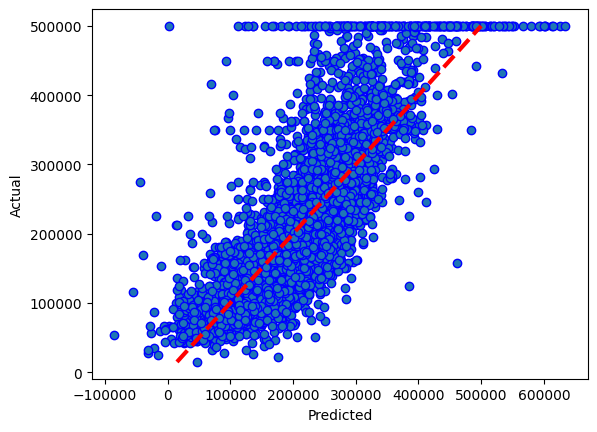

In [7]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [8]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49917.74778670201
RMSE is 69670.2246321015
R2 score is 0.6436124966178081


## Cross validation

In [9]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 49424.36625416404
 Average RMSE:  67597.31665394848
Average R2:  0.6508107132208604


# 14 model de regression lineaire

In [27]:
immo_df14 = pd.read_csv("immo_iteration14.csv")
immo_df14

,index,longitude,latitude,housing_median_age,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,total_bedrooms_log,median_income_log,population_log,room_per_households_log
0,2072.0,-119.84,36.77,6.0,0.0,1.0,0.0,0.0,0.0,72000.0,6.159095,0.393190,7.242082,1.491475
1,10600.0,-117.80,33.68,8.0,1.0,0.0,0.0,0.0,0.0,274100.0,5.855072,1.933447,6.759255,1.787830
2,2494.0,-120.19,36.60,25.0,0.0,1.0,0.0,0.0,0.0,58300.0,5.365976,0.440575,6.836259,1.408248
3,4284.0,-118.32,34.10,31.0,1.0,0.0,0.0,0.0,0.0,200000.0,5.433722,0.424221,6.391917,1.007990
4,16541.0,-121.23,37.79,21.0,0.0,1.0,0.0,0.0,0.0,117900.0,5.921578,1.406465,7.029973,1.642228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,0.0,1.0,0.0,0.0,0.0,93800.0,5.627621,1.119232,6.613384,1.768150
16463,18898.0,-122.25,38.11,49.0,0.0,0.0,0.0,1.0,0.0,103100.0,6.222576,0.960614,7.030857,1.641664
16464,11798.0,-121.22,38.92,19.0,0.0,1.0,0.0,0.0,0.0,192600.0,6.133398,1.503144,7.095064,1.774913
16465,6637.0,-118.14,34.16,39.0,1.0,0.0,0.0,0.0,0.0,153500.0,6.733402,0.945850,7.842279,1.278487


In [28]:
y = immo_df14["median_house_value"]
X = immo_df14.copy()

In [29]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,total_bedrooms_log,median_income_log,population_log,room_per_households_log
0,2072.0,-119.84,36.77,6.0,0.0,1.0,0.0,0.0,0.0,6.159095,0.393190,7.242082,1.491475
1,10600.0,-117.80,33.68,8.0,1.0,0.0,0.0,0.0,0.0,5.855072,1.933447,6.759255,1.787830
2,2494.0,-120.19,36.60,25.0,0.0,1.0,0.0,0.0,0.0,5.365976,0.440575,6.836259,1.408248
3,4284.0,-118.32,34.10,31.0,1.0,0.0,0.0,0.0,0.0,5.433722,0.424221,6.391917,1.007990
4,16541.0,-121.23,37.79,21.0,0.0,1.0,0.0,0.0,0.0,5.921578,1.406465,7.029973,1.642228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,0.0,1.0,0.0,0.0,0.0,5.627621,1.119232,6.613384,1.768150
16463,18898.0,-122.25,38.11,49.0,0.0,0.0,0.0,1.0,0.0,6.222576,0.960614,7.030857,1.641664
16464,11798.0,-121.22,38.92,19.0,0.0,1.0,0.0,0.0,0.0,6.133398,1.503144,7.095064,1.774913
16465,6637.0,-118.14,34.16,39.0,1.0,0.0,0.0,0.0,0.0,6.733402,0.945850,7.842279,1.278487


## Linear Regression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5981564503515002

In [31]:
y_predicted = model.predict(X_test)

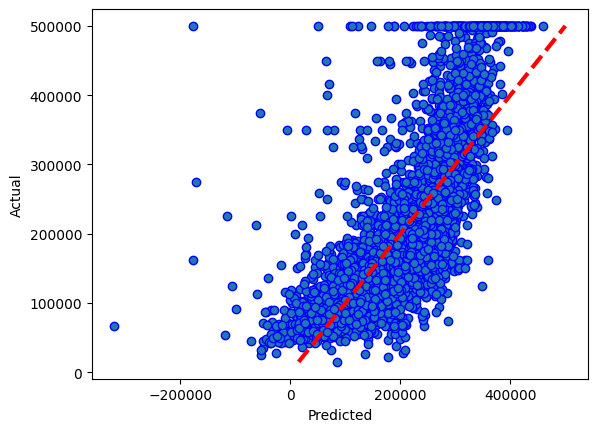

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [33]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 54559.227806027666
RMSE is 73980.02571156474
R2 score is 0.5981564503515002


## Cross validation

In [34]:
scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', average_mae)
print(' Average RMSE: ', average_rmse)
print("Average R2: ", average_r2)


The model performance for testing set
--------------------------------------
Average MAE: 53616.3919245564
 Average RMSE:  71288.54759542015
Average R2:  0.6116669131999052


# 14 model de regression lineaire

In [35]:
immo_df15 = pd.read_csv("immo_iteration15.csv")
immo_df15

,index,longitude,latitude,housing_median_age,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,total_bedrooms_log,median_income_log,population_log,room_per_households_log,median_house_value_log
0,2072.0,-119.84,36.77,6.0,0.0,1.0,0.0,0.0,0.0,6.159095,0.393190,7.242082,1.491475,11.184421
1,10600.0,-117.80,33.68,8.0,1.0,0.0,0.0,0.0,0.0,5.855072,1.933447,6.759255,1.787830,12.521248
2,2494.0,-120.19,36.60,25.0,0.0,1.0,0.0,0.0,0.0,5.365976,0.440575,6.836259,1.408248,10.973357
3,4284.0,-118.32,34.10,31.0,1.0,0.0,0.0,0.0,0.0,5.433722,0.424221,6.391917,1.007990,12.206073
4,16541.0,-121.23,37.79,21.0,0.0,1.0,0.0,0.0,0.0,5.921578,1.406465,7.029973,1.642228,11.677592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,0.0,1.0,0.0,0.0,0.0,5.627621,1.119232,6.613384,1.768150,11.448920
16463,18898.0,-122.25,38.11,49.0,0.0,0.0,0.0,1.0,0.0,6.222576,0.960614,7.030857,1.641664,11.543455
16464,11798.0,-121.22,38.92,19.0,0.0,1.0,0.0,0.0,0.0,6.133398,1.503144,7.095064,1.774913,12.168371
16465,6637.0,-118.14,34.16,39.0,1.0,0.0,0.0,0.0,0.0,6.733402,0.945850,7.842279,1.278487,11.941456


In [37]:
y = immo_df15["median_house_value_log"]
X = immo_df15.copy()

In [38]:
X= X.drop("median_house_value_log", axis=1)
X

,index,longitude,latitude,housing_median_age,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,total_bedrooms_log,median_income_log,population_log,room_per_households_log
0,2072.0,-119.84,36.77,6.0,0.0,1.0,0.0,0.0,0.0,6.159095,0.393190,7.242082,1.491475
1,10600.0,-117.80,33.68,8.0,1.0,0.0,0.0,0.0,0.0,5.855072,1.933447,6.759255,1.787830
2,2494.0,-120.19,36.60,25.0,0.0,1.0,0.0,0.0,0.0,5.365976,0.440575,6.836259,1.408248
3,4284.0,-118.32,34.10,31.0,1.0,0.0,0.0,0.0,0.0,5.433722,0.424221,6.391917,1.007990
4,16541.0,-121.23,37.79,21.0,0.0,1.0,0.0,0.0,0.0,5.921578,1.406465,7.029973,1.642228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16462,1099.0,-121.90,39.59,20.0,0.0,1.0,0.0,0.0,0.0,5.627621,1.119232,6.613384,1.768150
16463,18898.0,-122.25,38.11,49.0,0.0,0.0,0.0,1.0,0.0,6.222576,0.960614,7.030857,1.641664
16464,11798.0,-121.22,38.92,19.0,0.0,1.0,0.0,0.0,0.0,6.133398,1.503144,7.095064,1.774913
16465,6637.0,-118.14,34.16,39.0,1.0,0.0,0.0,0.0,0.0,6.733402,0.945850,7.842279,1.278487


## Linear Regression

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6777917062653772

In [46]:
y_predicted_log = model.predict(X_test)

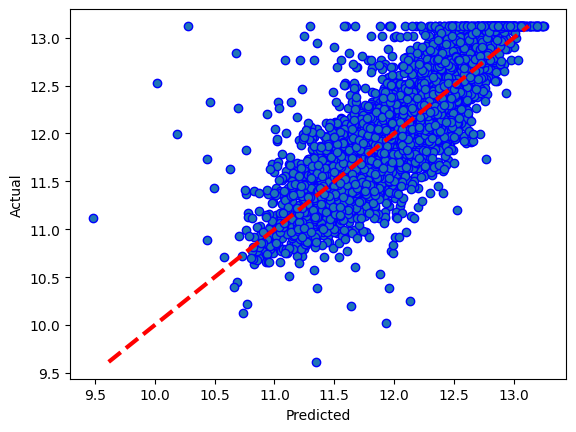

In [47]:
fig, ax = plt.subplots()
ax.scatter(y_predicted_log, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [48]:
y_pred = np.exp(y_predicted_log)

In [42]:
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.23789275328889437
RMSE is 0.3258591307746779
R2 score is 0.6777917062653772


## Cross validation

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

scores = cross_validate(model, X, y, cv=5)
predictions = model.predict(X)
predictions_original_scale = np.exp(predictions)
y_original_scale = np.exp(y)

average_r2_real=scores['test_score'].mean()
rmse_real = np.sqrt(mean_squared_error(y_original_scale, predictions_original_scale))
mae_real = mean_absolute_error(y_original_scale, predictions_original_scale)

print("The model performance for testing set")
print("--------------------------------------")
print('Average MAE:', mae_real)
print(' Average RMSE: ', rmse_real)
print("Average R2: ", average_r2_real)

The model performance for testing set
--------------------------------------
Average MAE: 45546.59146047279
 Average RMSE:  65695.48253325764
Average R2:  0.6926309931411835


In [ ]:
# save the model to disk
filename = 'linear_regression.sav'
pickle.dump(reg, open(filename, 'wb'))